In [ ]:
!pip uninstall -q tensorboard tb-nightly
!pip install -q tb-nightly

Proceed (y/n)? y


In [ ]:
!pip install -q kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

!kaggle competitions download -c plant-pathology-2020-fgvc7

mkdir: cannot create directory ‘/root/.kaggle’: File exists
plant-pathology-2020-fgvc7.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import numpy as np 
import pandas as pd
import os
from PIL import Image
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import torch
from torch.utils.data import Dataset
from torchvision.datasets import ImageFolder
import torchvision.transforms as T

In [ ]:
!unzip -q plant-pathology-2020-fgvc7.zip -d Plant_Pathology;

replace Plant_Pathology/images/Test_0.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


In [ ]:
data_dir = '/content/Plant_Pathology'
files = os.listdir(data_dir)
files

['train.csv', 'images', 'test.csv', 'sample_submission.csv']

In [ ]:
img_dir = data_dir + '/images'
image_files = os.listdir(img_dir)
image_files[:10]

['Test_1554.jpg',
 'Test_392.jpg',
 'Train_1778.jpg',
 'Test_462.jpg',
 'Train_1450.jpg',
 'Train_1431.jpg',
 'Train_258.jpg',
 'Test_290.jpg',
 'Train_448.jpg',
 'Train_335.jpg']

In [ ]:
# Splitting Train & test images
def parse_breed(fname):
  parts = fname.split('.')
  return ' '.join(parts[:-1])

In [ ]:
parse_breed(image_files[30])

'Test_646'

In [ ]:
def open_image(path):
  with open(path, 'rb') as f:
    img = Image.open(f);
    img_array = np.array(img)
    print(img_array.shape)
    return img.convert('RGB')
    # return a

def matplot_img(path):
  with open(path, 'rb') as f:
    img = Image.open(f);
    img_array = np.array(img)
    print(img_array.shape)
    return plt.imshow(img)

(1365, 2048, 3)


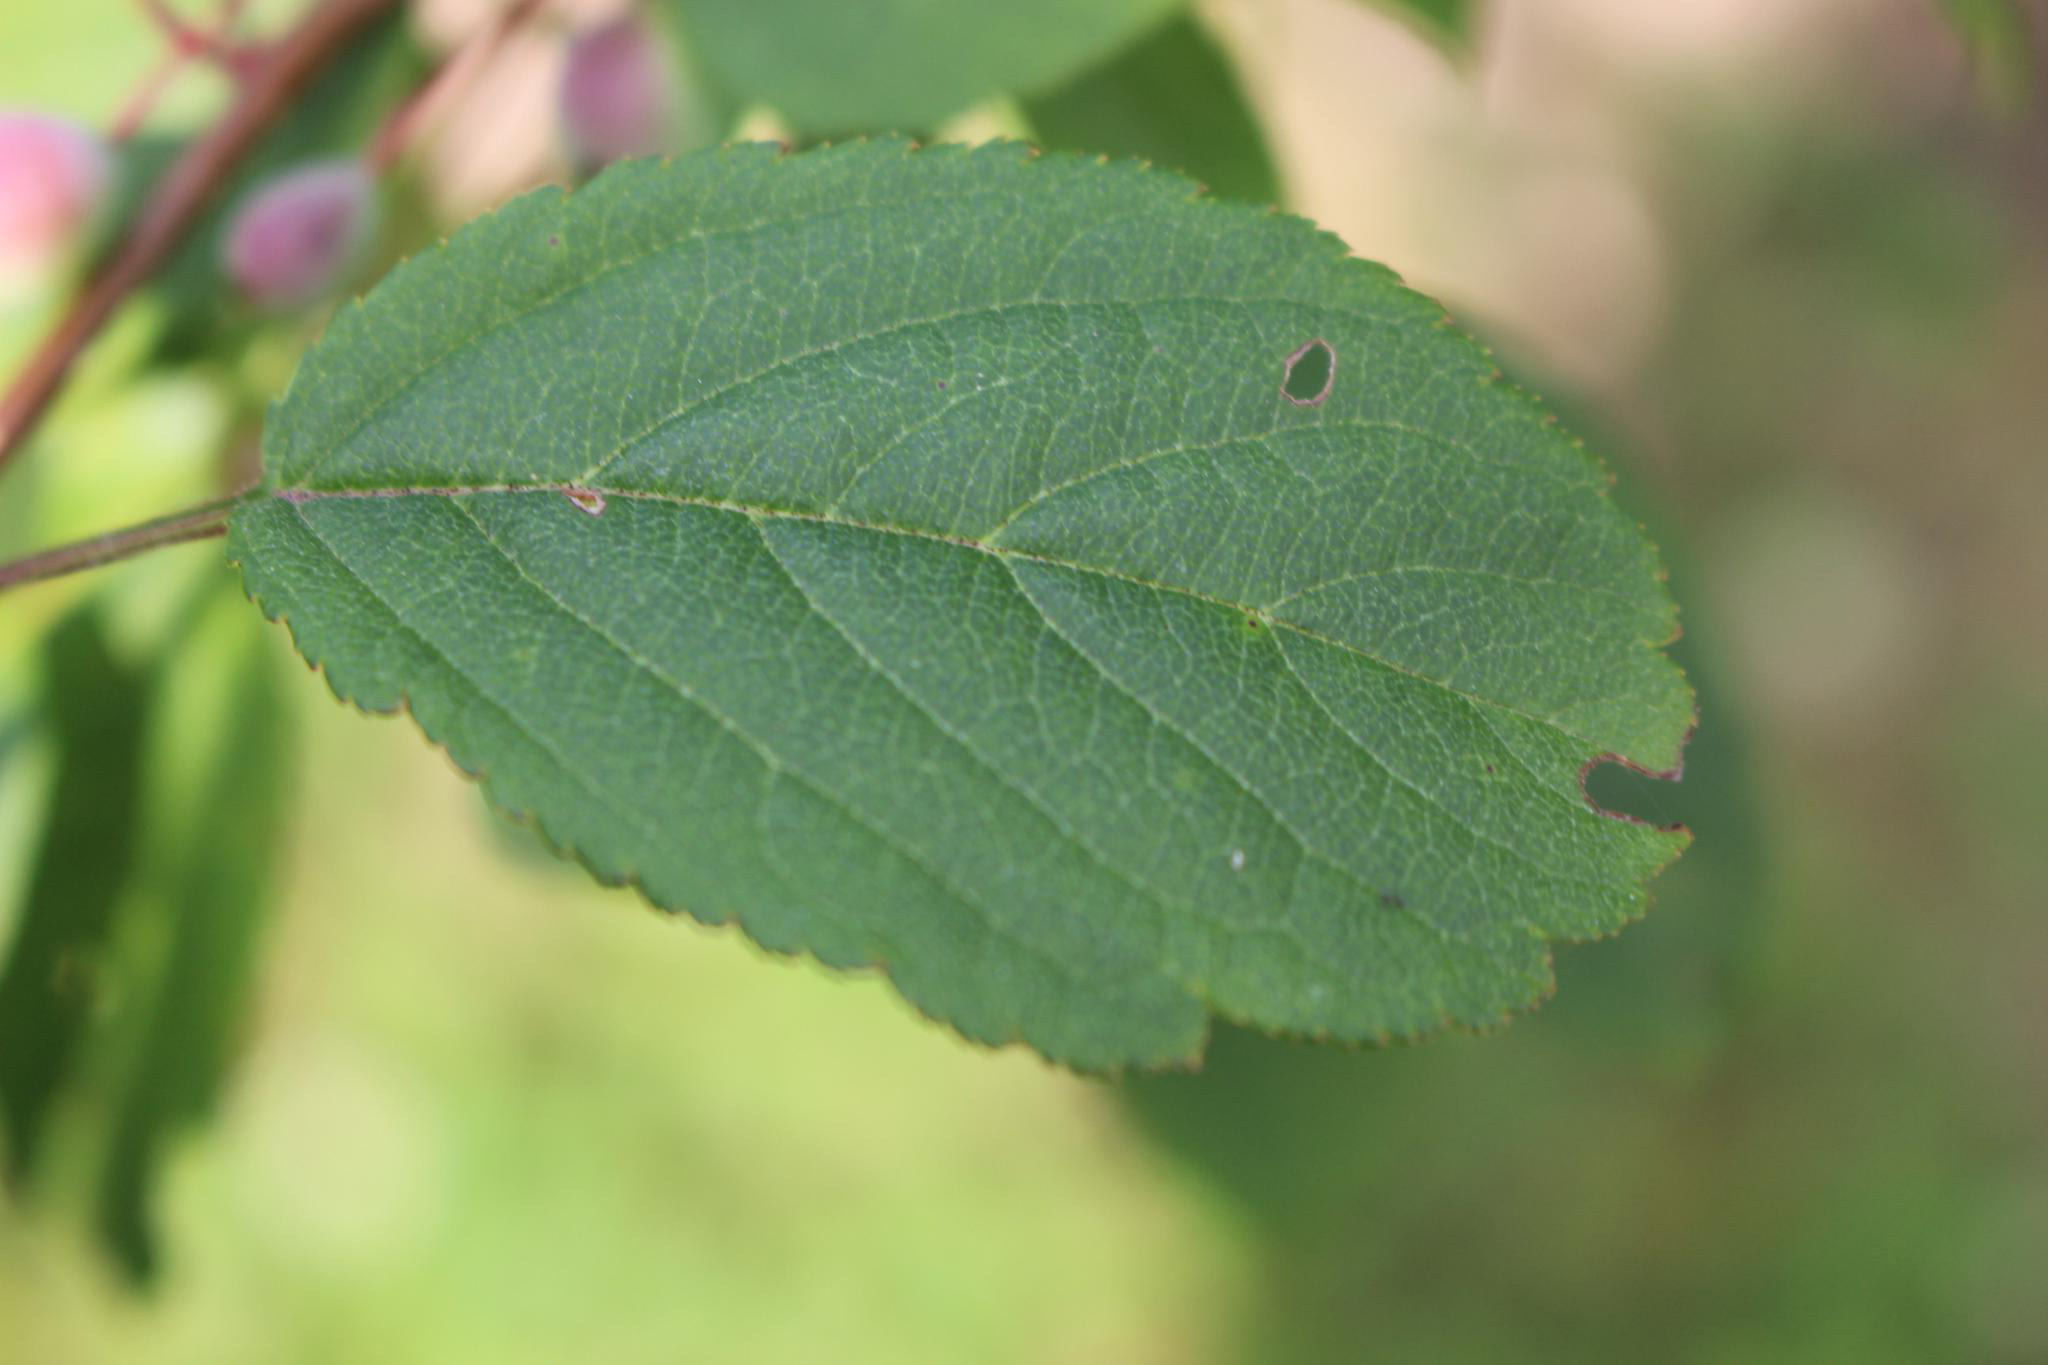

In [ ]:
open_image(img_dir + '/Train_956.jpg')

(1365, 2048, 3)


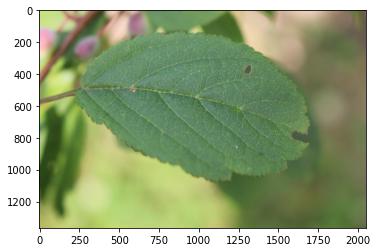

In [ ]:
matplot_img(img_dir + '/Train_956.jpg');

In [ ]:
class PlantDataset(Dataset):
  def __init__(self, root, transform):
    super().__init__()
    self.root = root
    self.files = [fname for fname in os.listdir(root) if fname.endswith('jpg')]
    self.classes = list(set(parse_breed(fname) for fname in image_files))
    self.transform = transform
  
  def __len(self):
    return len(self.image_files)
  
  def __getitem__(self, i):
    fname = self.files[i]
    fpath = os.path.join(self.root, fname)
    img = self.transform(open_image(fpath))
    # class_idx = self.classes.index(files)
    class_idx = self.classes.index(parse_breed(fname))
    return img, class_idx

In [ ]:
img_size = 1080
imagenet_stats = ([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
dataset = PlantDataset(img_dir, T.Compose([
                                          T.Resize(img_size), 
                                          T.Pad(24, padding_mode='reflect'),
                                          T.RandomCrop(img_size), 
                                          T.ToTensor(), 
                                          T.Normalize(*imagenet_stats)]))

In [ ]:
def denormalize(images, means, stds):
    if len(images.shape) == 3:
        images = images.unsqueeze(0)
    means = torch.tensor(means).reshape(1, 3, 1, 1)
    stds = torch.tensor(stds).reshape(1, 3, 1, 1)
    return images * stds + means

def show_image(img_tensor, label):
    print('Label:', dataset.classes[label], '(' + str(label) + ')')
    img_tensor = denormalize(img_tensor, *imagenet_stats)[0].permute((1, 2, 0))
    plt.imshow(img_tensor)

(1365, 2048, 3)
Label: Train_258 (3539)


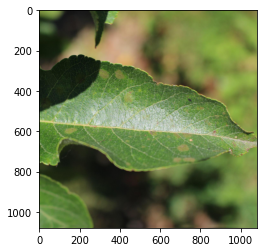

In [ ]:
show_image(*dataset[6])

In [ ]:
from torch.utils.data import random_split
dl = len(os.listdir(img_dir))
val_size = int(0.1*dl)
train_ds, valid_ds = random_split(dataset, [dl-val_size, val_size])

TypeError: ignored

In [ ]:
from torch.utils.data import DataLoader

batch_size = 256
train_df = DataLoader(train)